#Torsional Oscillator

#Imports

In [52]:
import numpy as np #numpy is for arrays and matricies operations
import pandas as pd #Pandas is for data manipulation and analysis, esp structures and operations for manipulating numerical tables
import scipy.stats as ss # stats
import matplotlib.pyplot as plt # graphing



In [53]:
#from google.colab import drive
#drive.mount('/content/drive')
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"

In [54]:
#for editing google sheets directly from python (we don't need to do that here I don't think)

#from google.colab import auth
#auth.authenticate_user()

#import gspread
#from oauth2client.client import GoogleCredentials

#gc = gspread.authorize(GoogleCredentials.get_application_default())

In [55]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb
'''
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(ddate, maine_data['Temp (F)'], label = 'Temp')
p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Temperature ($^{\circ}$F)', color=txt, fontsize=16)
ax.set_xlabel(r'Year', color=txt, fontsize=16)
ax.set_title(r'Maine - Temperature vs Year', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()
'''

'\nfig, ax = plt.subplots()\ntxt = \'black\'\np1 = ax.plot(ddate, maine_data[\'Temp (F)\'], label = \'Temp\')\np2 = ax.plot(ddate, fit, color = \'black\', label = \'Linear Fit\')\np3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = \'orange\', label = r\'1$\\sigma$ PI\')\np4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = \'yellow\', label = r\'2$\\sigma$ CI\')\nax.set_ylabel(r\'Temperature ($^{\\circ}$F)\', color=txt, fontsize=16)\nax.set_xlabel(r\'Year\', color=txt, fontsize=16)\nax.set_title(r\'Maine - Temperature vs Year\', color=txt, fontsize = 18)\nax.tick_params(axis=\'x\', labelsize=16, colors=txt)\nax.tick_params(axis=\'y\', labelsize=16, colors=txt)\nax.legend(loc=\'lower right\')\nplt.rcParams["figure.figsize"] = (16,9)\nplt.show()\n'

In [56]:
# I have defined a function that allows you to put in set a dataframe =driveSheetToDF(Sheet_id, Sheet_Name) and it will return a df
def driveSheetToDF(Sheet_id, Sheet_Name):
  Sheet_url = f"https://docs.google.com/spreadsheets/d/{Sheet_id}/gviz/tq?tqx=out:csv&sheet={Sheet_Name}"
  New_df_name = pd.read_csv(Sheet_url)
  return(New_df_name)
  driveSheetToDF()

In [57]:
def deleteRowsDF(ExtraTime,Temp_df,ColumnToShorten):
  NRows = int(ExtraTime * 50)
  Temp_df = Temp_df.drop(range(0,NRows), axis=0)
  Temp_df[ColumnToShorten] = Temp_df[ColumnToShorten] - ExtraTime
  return(Temp_df)
  deleteRowsDF()

In [58]:
#%% cell

#September 7, 2023

In [59]:
#linear fit from graph of

Correctional_Offset_Rad = [3, 2.5, 3.5, 2.0, 4.0, 1.5, 4.5]
Correctional_Offset_Rad_uncert = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
Correctional_Offset_Voltage = [0.00, -0.7573, 0.7091, -1.558, 1.446, -2.152, 2.168] #plus or minus 0.003 y-intercepts
Correctional_Offset_Voltage_uncert =[0.003, 0.004, 0.003, 0.001, 0.007, 0.002, 0.002] #Uncertainty of y-intercepts



In [60]:
df = pd.DataFrame(list(zip(Correctional_Offset_Rad, Correctional_Offset_Rad_uncert, Correctional_Offset_Voltage, Correctional_Offset_Voltage_uncert)),
               columns =['Radians', 'Rad_Uncert', 'Voltage', 'Voltage_Uncert'])

In [61]:
df

Radians  Rad_Uncert  Voltage  Voltage_Uncert
0      3.0        0.05   0.0000           0.003
1      2.5        0.05  -0.7573           0.004
2      3.5        0.05   0.7091           0.003
3      2.0        0.05  -1.5580           0.001
4      4.0        0.05   1.4460           0.007
5      1.5        0.05  -2.1520           0.002
6      4.5        0.05   2.1680           0.002

<ErrorbarContainer object of 3 artists>

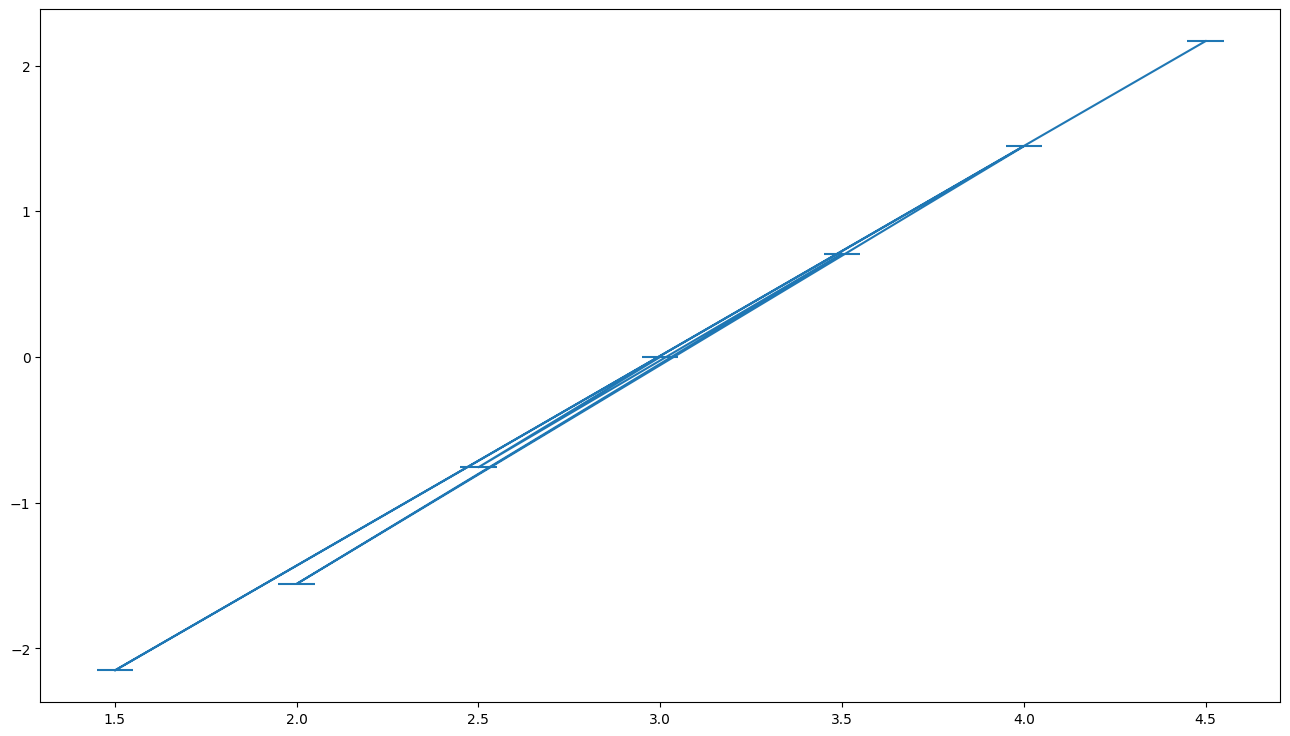

In [62]:
plt.errorbar(df.Radians, df.Voltage, xerr=df.Rad_Uncert, yerr= df.Voltage_Uncert)

In [63]:
df = df.sort_values('Radians')# sort in ascending order so graph does not bounce around.
df

Radians  Rad_Uncert  Voltage  Voltage_Uncert
5      1.5        0.05  -2.1520           0.002
3      2.0        0.05  -1.5580           0.001
1      2.5        0.05  -0.7573           0.004
0      3.0        0.05   0.0000           0.003
2      3.5        0.05   0.7091           0.003
4      4.0        0.05   1.4460           0.007
6      4.5        0.05   2.1680           0.002

<ErrorbarContainer object of 3 artists>

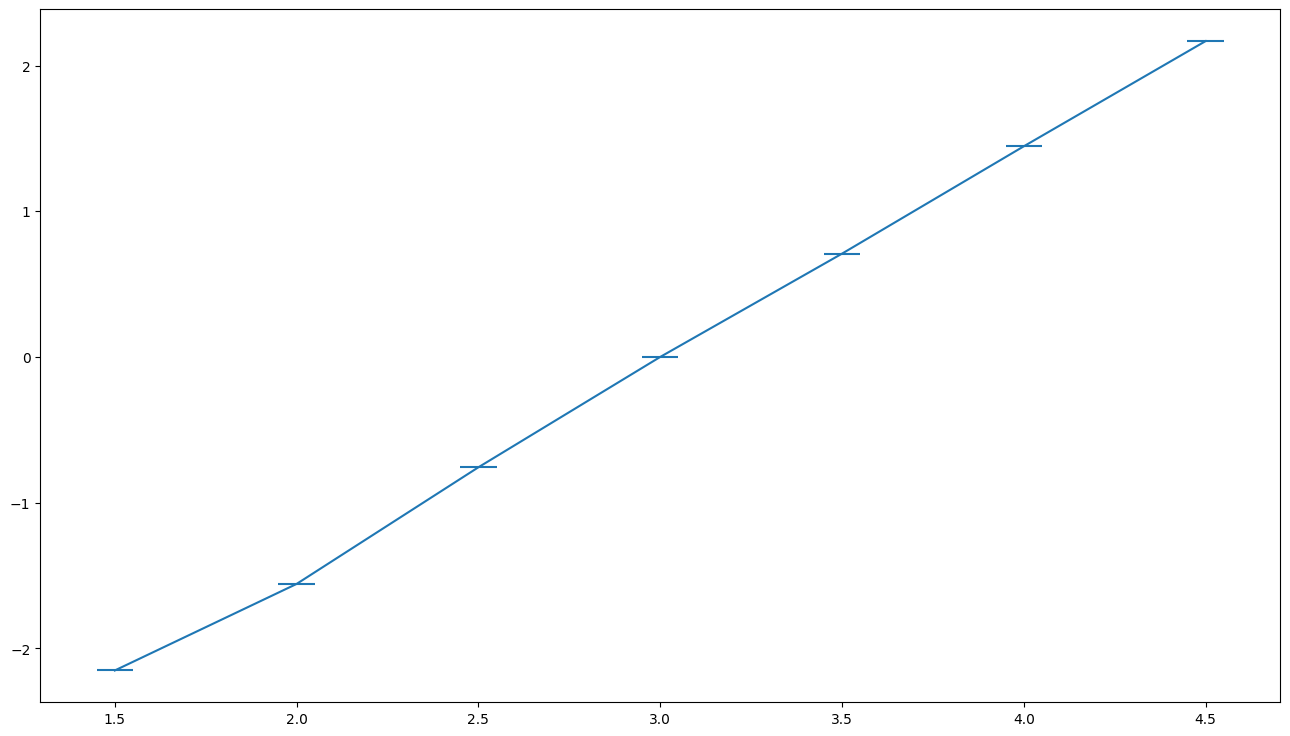

In [64]:
plt.errorbar(df.Radians, df.Voltage, xerr=df.Rad_Uncert, yerr= df.Voltage_Uncert)

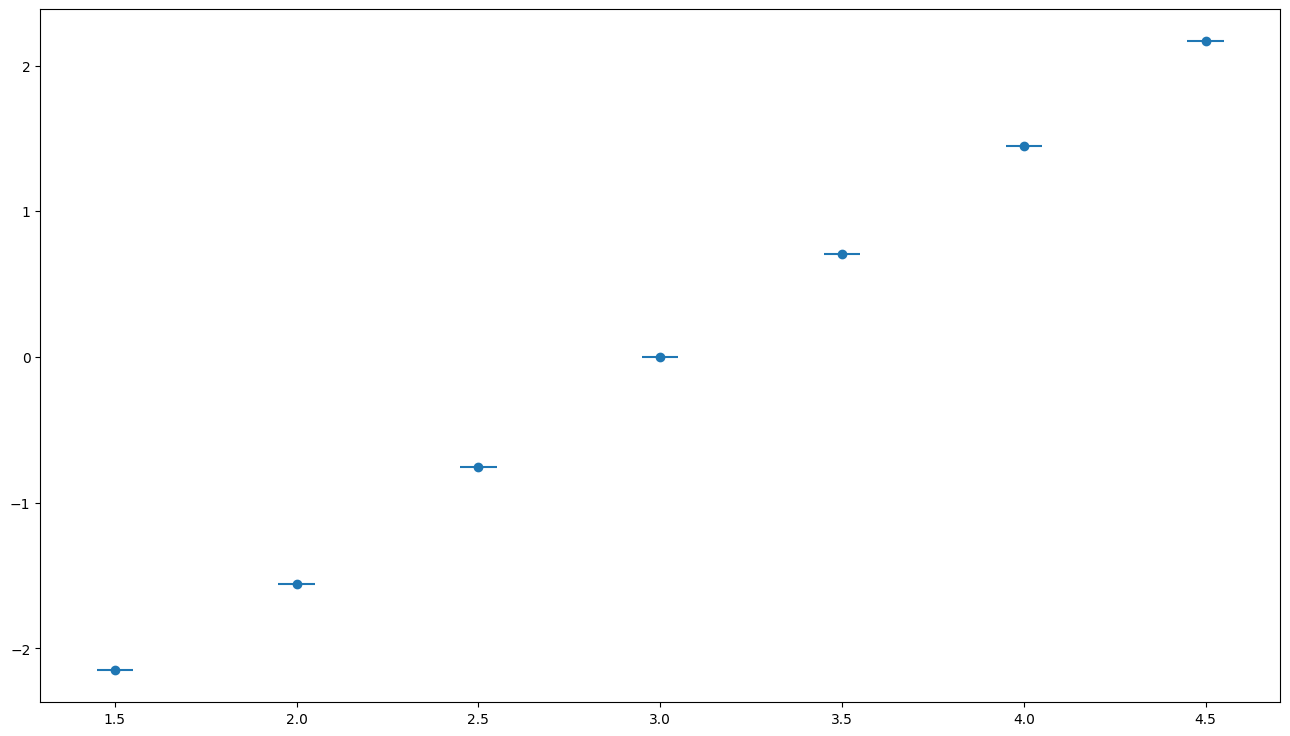

In [65]:
#plt.plot(Correctional_Offset_Rad, Correctional_Offset_Voltage, 'bo')
plt.errorbar(Correctional_Offset_Rad, Correctional_Offset_Voltage,
             xerr=0.05,
             yerr=Correctional_Offset_Voltage_uncert,
             fmt ='o')
plt.show()

1.4596
-4.3994


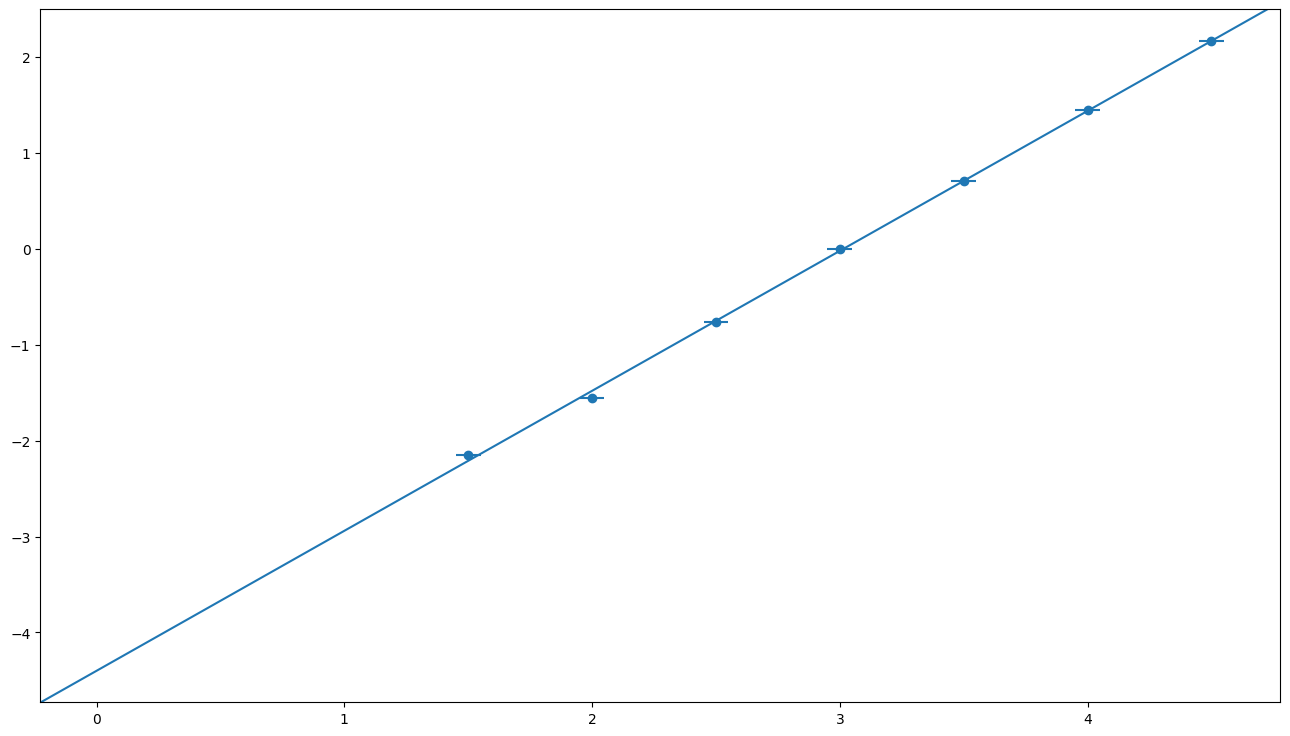

In [66]:
#Linear Regression using SciPy

m, b, *_ = ss.linregress(df.Radians, df.Voltage)
print(m)
print(b)

plt.axline(xy1=(0, b), slope=m, label=f'$y = {m:.1f}x {b:+.1f}$')

plt.errorbar(Correctional_Offset_Rad, Correctional_Offset_Voltage,
             xerr=0.05,
             yerr=Correctional_Offset_Voltage_uncert,
             fmt ='o')
plt.show()

In [67]:
#%% cell break

#Thursday, September 14, 2023


Attached "sighting wire" plastic to apparatus

Attached Pulley string as seen in 1-3 Fig 1.0b

Attached Pulleys to Damper Assembly using black plastic thumb screws

Radius of rotor shaft at string attachment point as measured by Isaac the $\pm $ is the uncertainty of Isaac's measurement with the calipers.

$= 1.27 \pm 0.03 cm $

$= 0.0127 \pm 0.0003m$

$= 1.27x10^{-2} \pm 3x10^{-4}m  $

In [68]:
rotor_shaft_radius = 0.0127
rotor_shaft_radius_uncert = 0.0003

## Hanging Masses

Each mass had an uncertainty measurement of 0.05g as measured by Isaac C.


Left Set

50g hook =$ 49.9g \pm 0.05g $

50g weight = $ 49.8g \pm 0.05g $

100g weight = $ 100.0g \pm 0.05g $

200g weight = $ 200.1g \pm 0.05g $

Right Set

50g hook =$ 49.6g \pm 0.05g $

50g weight = $ 50.0g \pm 0.05g $

100g weight = $ 100.1g \pm 0.05g $

200g weight = $ 200.2g \pm 0.05g $

In [69]:
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
sheet_name = "HangingMasses"
HangingMasses_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

HangingMass_df = pd.read_csv(HangingMasses_url)
HangingMass_df.head(4)

Expect   Left  Lmass_uncert  Right  Rmass_uncert
0     50Hook   49.8           0.1   49.6           0.1
1   50weight   49.9           0.1   50.0           0.1
2  100weight  100.0           0.1  100.1           0.1
3  200weight  200.1           0.1  200.2           0.1

In [70]:
#Replaces 5 previous lines with 2 lines.
HangingMass_df = driveSheetToDF(sheet_id,"HangingMasses")
HangingMass_df.head(4)

Expect   Left  Lmass_uncert  Right  Rmass_uncert
0     50Hook   49.8           0.1   49.6           0.1
1   50weight   49.9           0.1   50.0           0.1
2  100weight  100.0           0.1  100.1           0.1
3  200weight  200.1           0.1  200.2           0.1

In [71]:
#%% cell break

##Calculate G in room

Force is calculated from the mean of 20 second data collections using a Dual range force sensor.

The Force Standard Error is calculated using using Standard error $= \frac{\sigma}{\sqrt{n}} $ from each 20 second data collection with the Dual range force sensor. σ was calculated for us by LoggerPro.   

the Standanard Error for each test was 0.004.


In [72]:
gravity_df = driveSheetToDF(sheet_id,"Gravity")
gravity_df.head(4)

kgMass  kgMass_unc   Force  Force_stderr
0  0.0498     0.00005  0.4922        0.0004
1  0.0987     0.00010  0.9817        0.0004
2  0.1997     0.00015  1.9640        0.0004
3  0.3998     0.00020  3.9490        0.0004

F = mg

g = F/m

Gravity = the slope of the linear fit of the Forces / Masses

In [73]:
#Calculate gravity here.

In [74]:
# as calculated by LoggerPro

gravity = 9.867
gravity_uncert = 0.0277

In [75]:
#%% cell break

##Calculate K the Torsion Constant 'Spring Constant' of the fiber.

Torque = mass * Gravity * radius

Torque = mass * Gravity * 0.0127

**Note after Lab concluded today I found

Torque = 2 * radius *mass * Gravity

In [76]:
K_data = driveSheetToDF(sheet_id, "Kcalc")
K_data.head(5)

Mass  MassUncert  kg_mass  kg_mass_uncert  Radians  RadiansUncert  \
0    0.0         0.0   0.0000          0.0000     3.00           0.02   
1  799.7         0.4   0.7997          0.0004     1.84           0.02   
2  699.8         0.3   0.6998          0.0003     1.99           0.02   
3  599.6         0.3   0.5996          0.0003     2.09           0.02   
4  499.7         0.2   0.4997          0.0002     2.20           0.02   

     Torque  Torque_uncert  
0  0.000000            NaN  
1  0.100211            NaN  
2  0.087693            NaN  
3  0.075136            NaN  
4  0.062618            NaN

In [77]:
K_Torque = 2* rotor_shaft_radius * K_data.kg_mass * gravity

print(K_Torque)


0     0.000000
1     0.200422
2     0.175385
3     0.150273
4     0.125236
5     0.100098
6     0.075061
7     0.049949
8     0.024912
9    -0.024912
10   -0.049949
11   -0.075061
12   -0.100098
13   -0.125236
14   -0.150273
15   -0.175385
16   -0.200422
Name: kg_mass, dtype: float64


In [78]:
#K_TorqueUncert =
#print(K_TorqueUncert)

In [79]:
K_data['Torque'] = K_Torque
K_data.head(17)
#print(K_data)

Mass  MassUncert  kg_mass  kg_mass_uncert  Radians  RadiansUncert  \
0     0.0         0.0   0.0000          0.0000     3.00           0.02   
1   799.7         0.4   0.7997          0.0004     1.84           0.02   
2   699.8         0.3   0.6998          0.0003     1.99           0.02   
3   599.6         0.3   0.5996          0.0003     2.09           0.02   
4   499.7         0.2   0.4997          0.0002     2.20           0.02   
5   399.4         0.3   0.3994          0.0003     2.32           0.02   
6   299.5         0.2   0.2995          0.0002     2.46           0.02   
7   199.3         0.2   0.1993          0.0002     2.62           0.02   
8    99.4         0.1   0.0994          0.0001     2.79           0.02   
9   -99.4         0.1  -0.0994          0.0001     3.18           0.02   
10 -199.3         0.2  -0.1993          0.0002     3.36           0.02   
11 -299.5         0.2  -0.2995          0.0002     3.52           0.02   
12 -399.4         0.3  -0.3994          0.0003     3.65           0.02   
13 -499.7         0.2  -0.4997          0.0002     3.77           0.02   
14 -599.6         0.3  -0.5996          0.0003     3.90           0.02   
15 -699.8         0.3  -0.6998          0.0003     3.98           0.02   
16 -799.7         0.4  -0.7997          0.0004     4.07           0.02   

      Torque  Torque_uncert  
0   0.000000            NaN  
1   0.200422            NaN  
2   0.175385            NaN  
3   0.150273            NaN  
4   0.125236            NaN  
5   0.100098            NaN  
6   0.075061            NaN  
7   0.049949            NaN  
8   0.024912            NaN  
9  -0.024912            NaN  
10 -0.049949            NaN  
11 -0.075061            NaN  
12 -0.100098            NaN  
13 -0.125236            NaN  
14 -0.150273            NaN  
15 -0.175385            NaN  
16 -0.200422            NaN

I have manually coppied the Torque values to the google sheet to avoid data loss.

This was before I realized we were missing a 2.

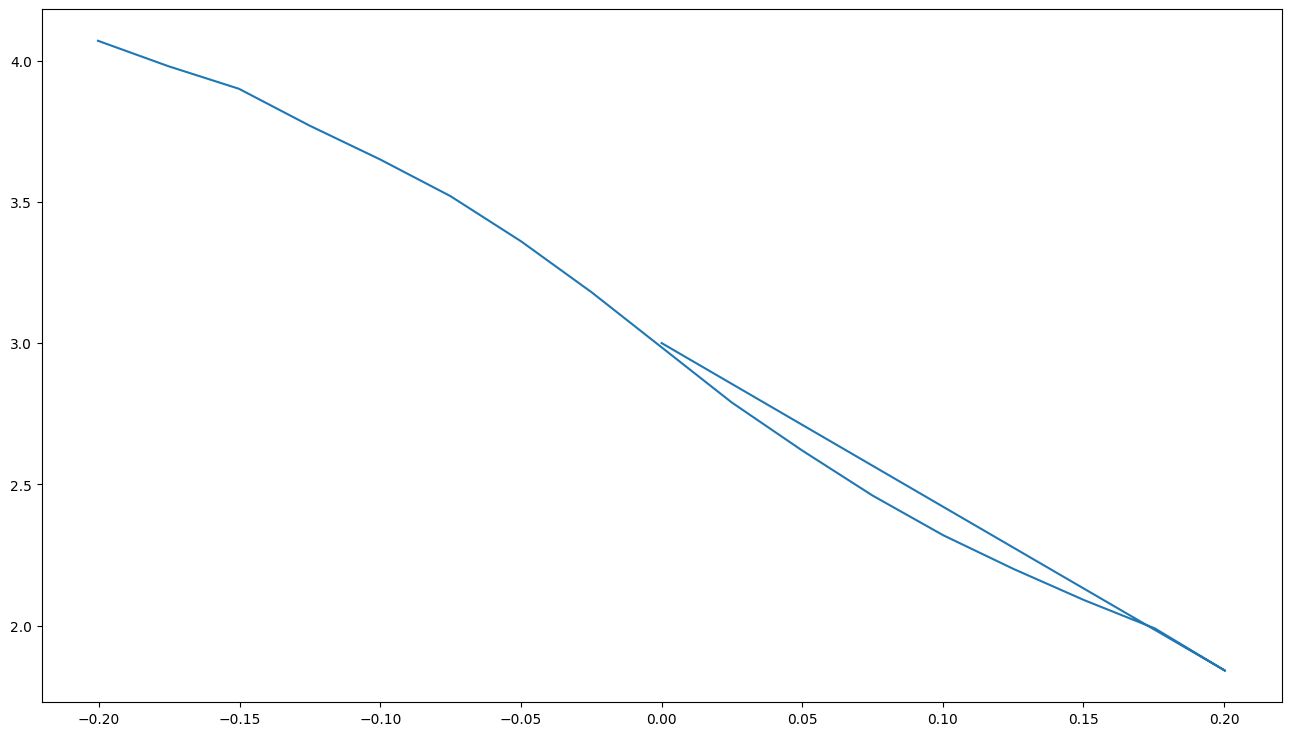

In [80]:
plt.plot(K_Torque,K_data['Radians'])

In [81]:
RadianDisplacement = K_data['Radians']-3

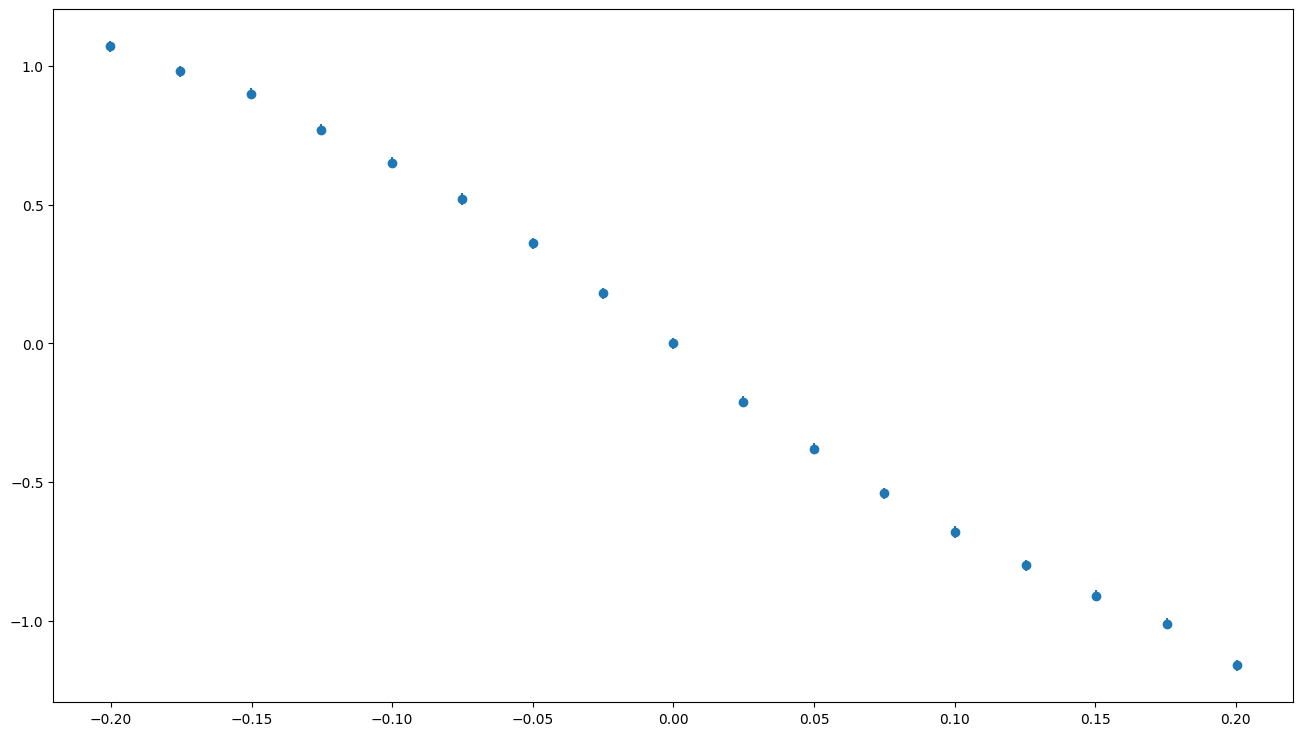

In [82]:
plt.errorbar(K_Torque,RadianDisplacement,
         #xerr= 0.05, #not the real error bars
         yerr= K_data['RadiansUncert'],
         fmt ='o')
plt.show()

In [83]:
#%% cell break

#Monday September 18, 2023


To Achieve a consistent 'release' using a DC Power Supply hooked up to Helmholtz Coil Drive.

The Power Supply is set to 8.000 V and runs at 1.027 A
- Radians settle around 3.58

When the switch on the oscilator is flipped, the coil goes from 1.027 A to about 0.003 A


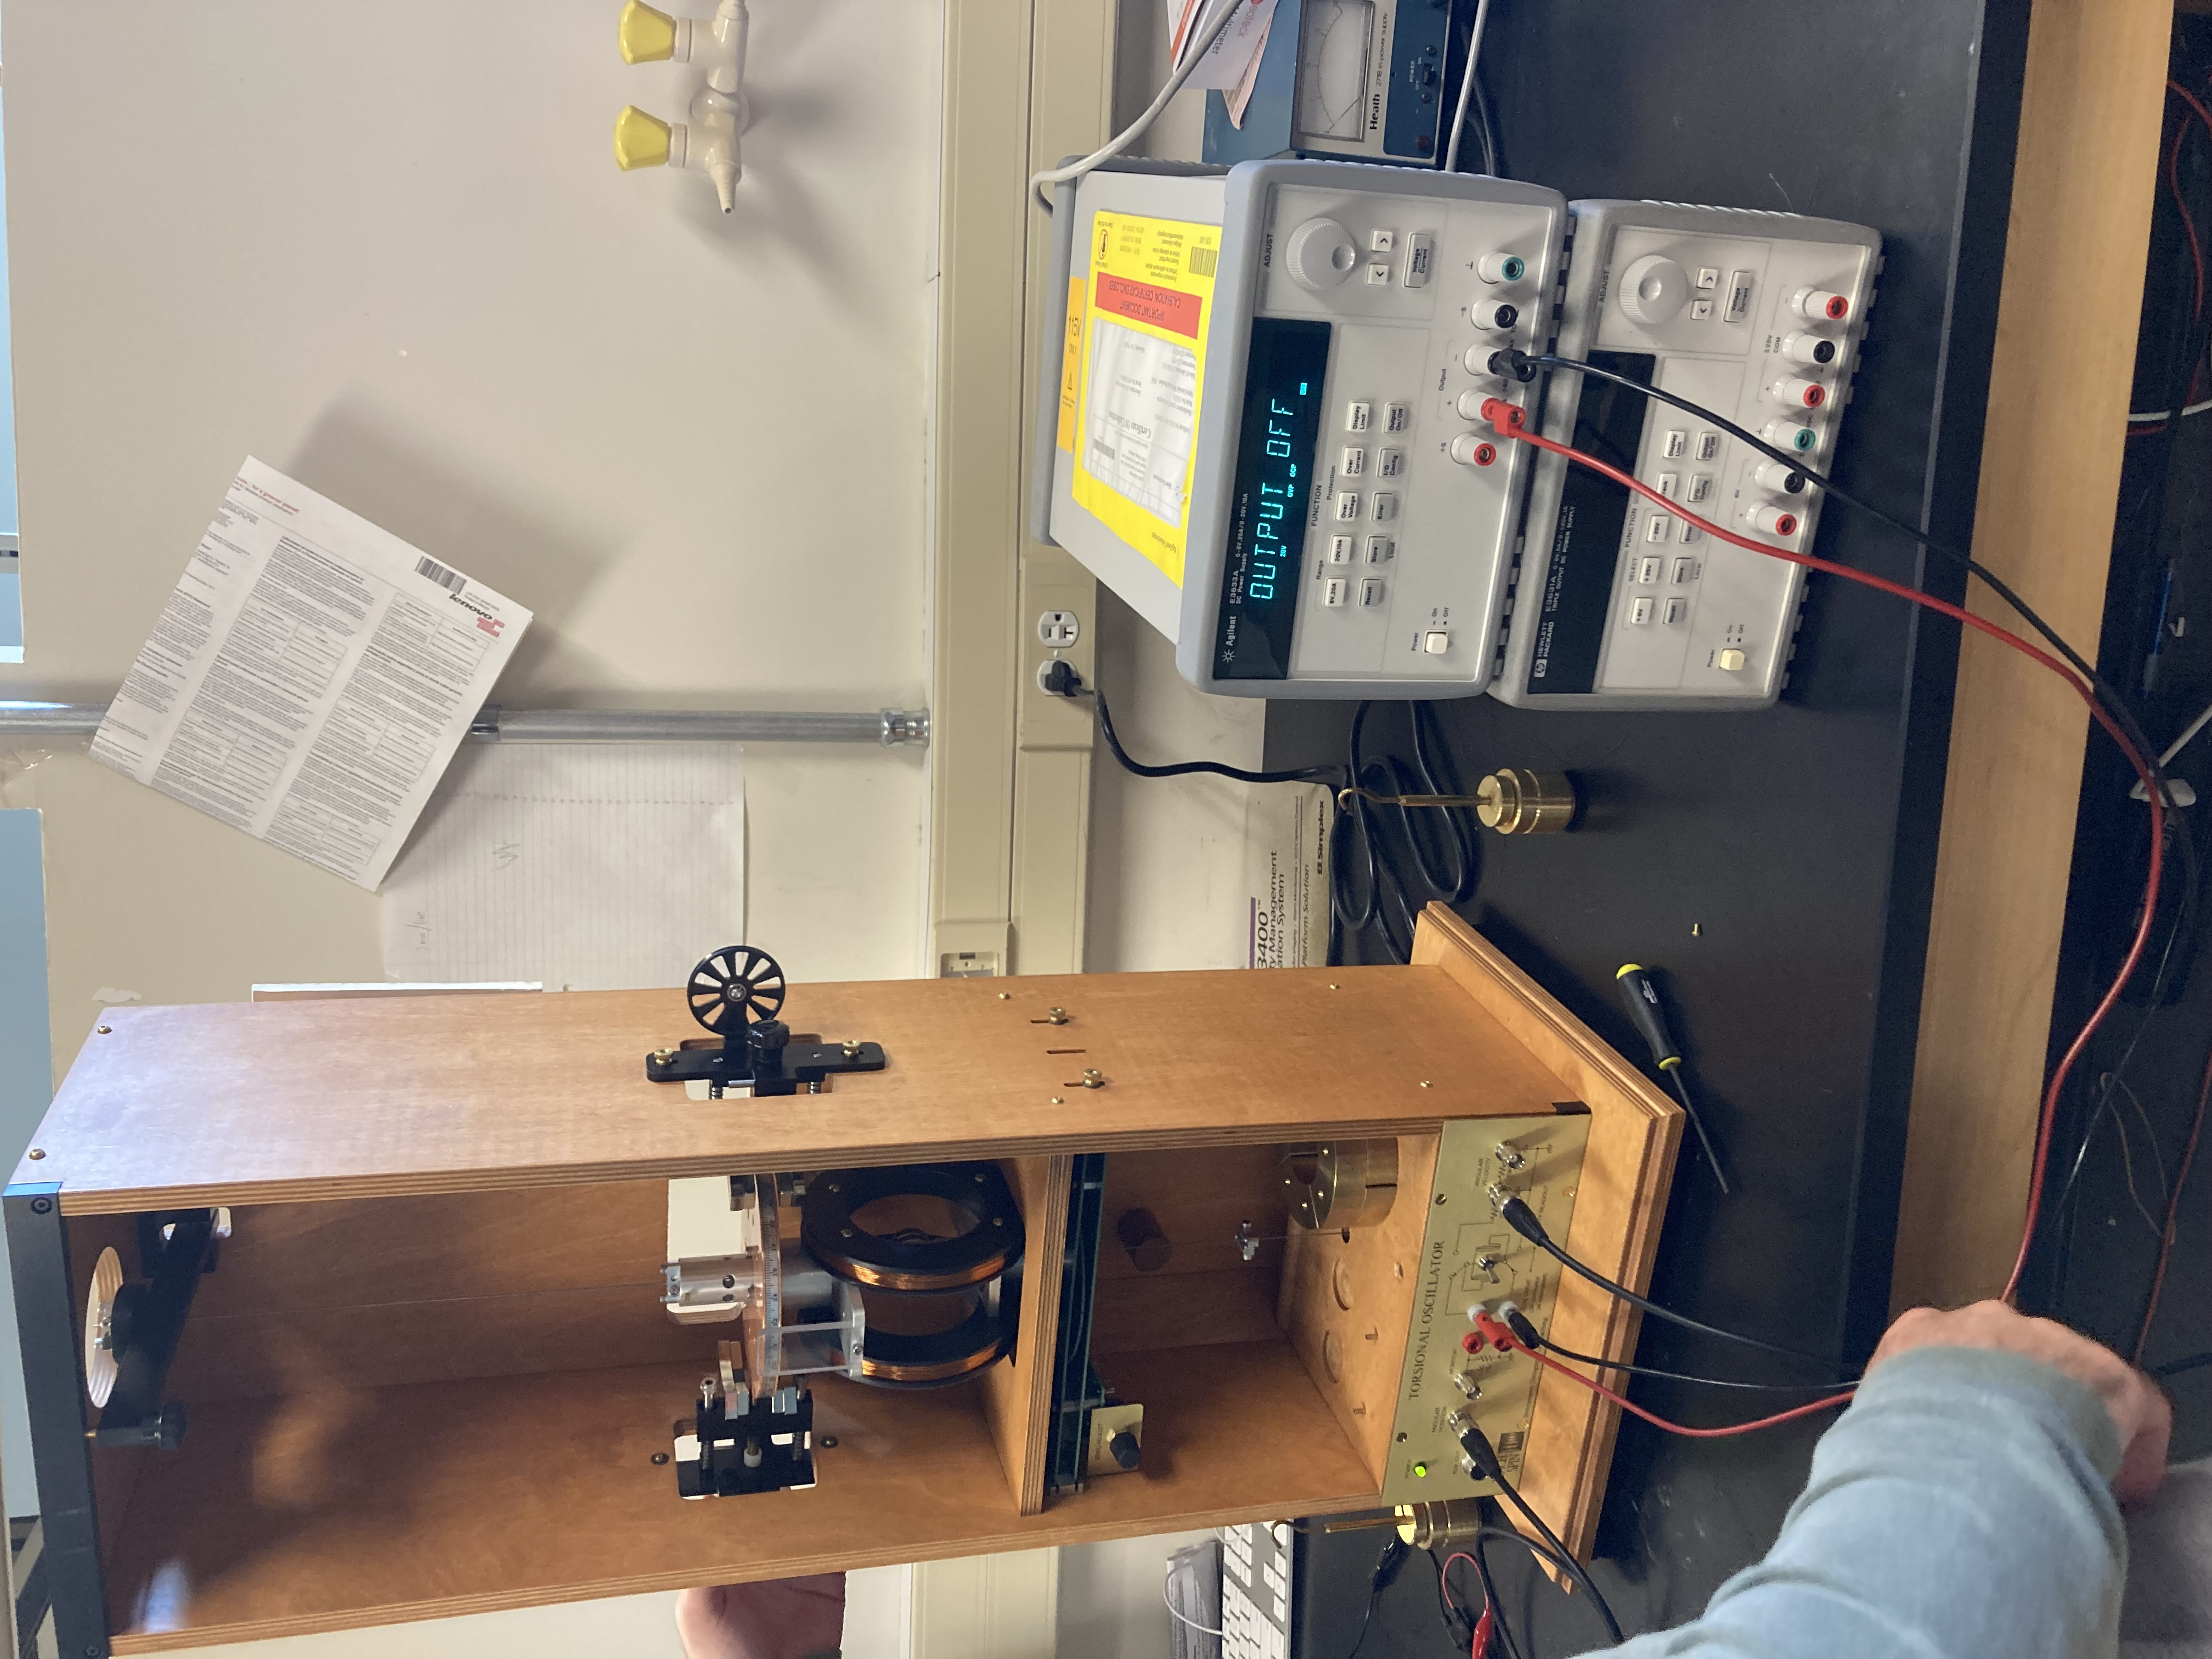

## Damping


Logger Pro column Text:

Latest: Time (s)

Latest: position (V)

Latest: angular velocity (V)

### Damping Control


In [84]:
#%% how to make a cell
#Control 1
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
sheet_name_ControlDamping1 = "ControlDamping1"
ControlDamping1_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name_ControlDamping1}"
CD1_df = pd.read_csv(ControlDamping1_url)
# oscillation starts at 1.22 seconds (row 63 in google sheets)

In [85]:
#Control 1 (done better with function)
sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
D1_df = driveSheetToDF(sheet_id,"ControlDamping1")
CD1_df.head(5)

Time  Position  AngularVelocity
0  0.00  0.852046         0.059425
1  0.02  0.852046         0.071635
2  0.04  0.852046         0.068582
3  0.06  0.855099         0.062477
4  0.08  0.852046         0.071635

In [86]:
CD1_df = CD1_df.drop(CD1_df.index[:61]) #drop rows of noise before oscilation starts. we want to keep the last line before it 'falls' though.
CD1_df.head(5)

Time  Position  AngularVelocity
61  1.22  0.836784         0.062477
62  1.24  0.745209        -0.032150
63  1.26  0.803206        -0.035200
64  1.28  0.815416        -0.053520
65  1.30  0.800154        -0.062680

In [87]:
CD1_df['Time'] = CD1_df['Time']-1.22 # set time to reflect dropped rows.
CD1_df.head(5)

Time  Position  AngularVelocity
61  0.00  0.836784         0.062477
62  0.02  0.745209        -0.032150
63  0.04  0.803206        -0.035200
64  0.06  0.815416        -0.053520
65  0.08  0.800154        -0.062680

In [88]:
#Control 2

CD2_df = driveSheetToDF(sheet_id,"ControlDamping2")
#CD2_df.head(5)
# oscillation starts at 2.08 seconds (row 106 in google sheets) First 2 rows are Python counting starting at 0 and header row.
CD2_df = CD2_df.drop(CD2_df.index[:104]) #drop rows of noise before oscilation starts.
CD2_df['Time'] = CD2_df['Time']-2.08 # set time to reflect dropped rows.
#CD2_df.head(5)

In [89]:
#Control 3
CD3_df = driveSheetToDF(sheet_id,"ControlDamping3")
# oscillation starts at 3.02 seconds (row 153 in google sheets)
CD3_df = CD3_df.drop(CD3_df.index[:151]) #drop rows of noise before oscilation starts.
CD3_df['Time'] = CD3_df['Time']-3.02 # set time to reflect dropped rows.
CD3_df.head(5)

Time  Position  AngularVelocity
151  0.00  0.827626         -0.00163
152  0.02  0.760471         -0.02910
153  0.04  0.790996         -0.03215
154  0.06  0.812364         -0.04741
155  0.08  0.803206         -0.06268

Wrote a function to delete extra time before the trial starts.
called deleteRowsDF.

it takes three arguments? (I think that is the right word)
1. ammount of time to delete
2. Data Frame to delete from
3. Which column is to be shortened.

In [90]:
CD3_df = driveSheetToDF(sheet_id,"ControlDamping3")
CD3_df = deleteRowsDF(3.02,CD3_df,'Time')
CD3_df.head(5)

Time  Position  AngularVelocity
151  0.00  0.827626         -0.00163
152  0.02  0.760471         -0.02910
153  0.04  0.790996         -0.03215
154  0.06  0.812364         -0.04741
155  0.08  0.803206         -0.06268

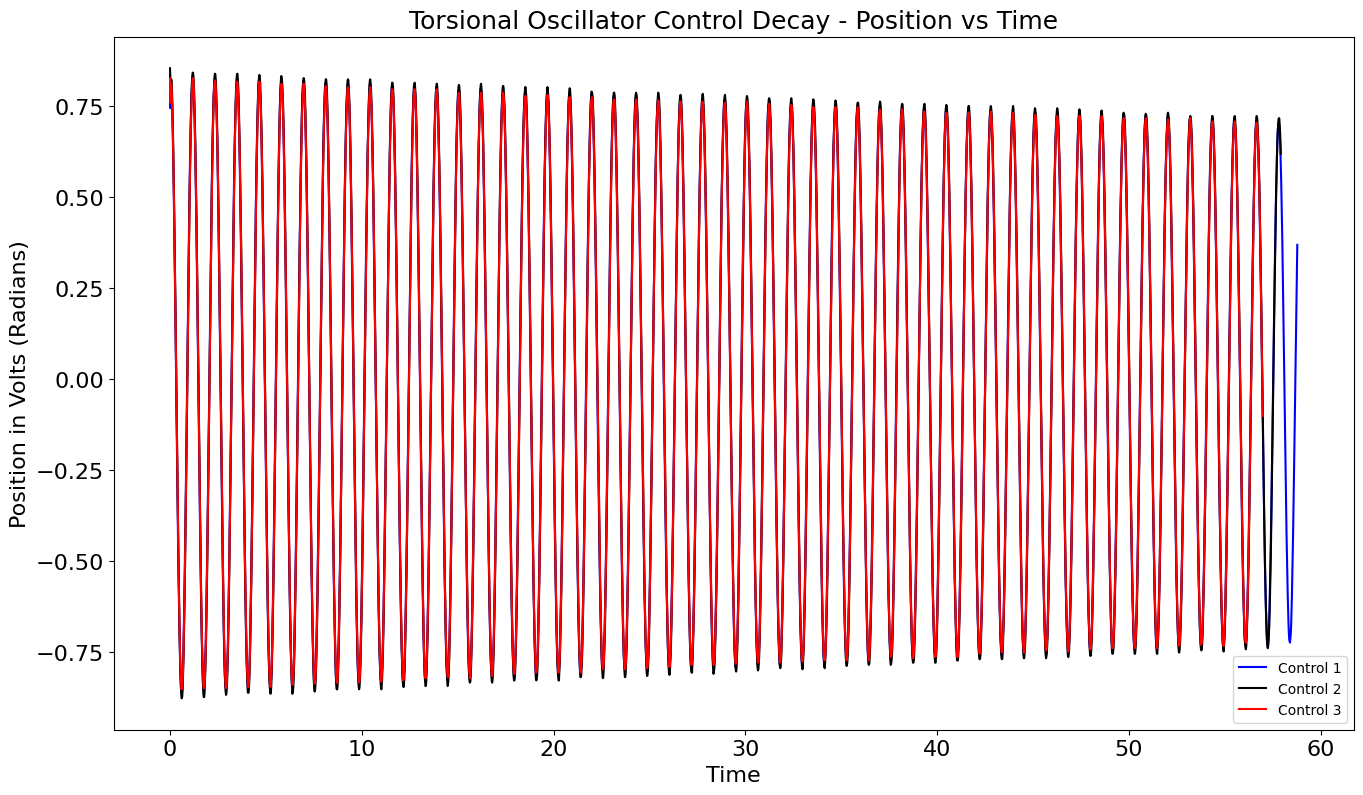

In [91]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(CD1_df['Time'], CD1_df['Position'], color = 'blue', label = 'Control 1')
p2 = ax.plot(CD2_df['Time'], CD2_df['Position'], color = 'black', label = 'Control 2')
p3 = ax.plot(CD3_df['Time'], CD3_df['Position'], color = 'red', label = 'Control 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Volts (Radians)', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Torsional Oscillator Control Decay - Position vs Time', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()


Maybe find peaks with scipy.signal.find_peaks

https://plotly.com/python/peak-finding/


In [92]:
#%% how to make a cell


### String Damping


In [93]:
#StringDamping101
#100g (50g per side) test 1
#sheet_id = "1DCE2fU1IOOTACkmHYz2ftKtwC3b9D0dsWxzaMWUdH2w"
#sheet_name = "stringdamping101"
#StringDamping101_url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
#SD101_df = pd.read_csv(StringDamping101_url)

SD101_df = driveSheetToDF(sheet_id,"stringdamping101") #oscilation starts at 1.10 (row 56)
SD101_df = deleteRowsDF(1.10,SD101_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.
SD101_df.head(5)


Time  Position  AngularVelocity
55  0.00  0.858151         -0.01078
56  0.02  0.778786         -0.02910
57  0.04  0.830679         -0.03826
58  0.06  0.827626         -0.05352
59  0.08  0.803206         -0.06573

In [94]:
#StringDamping102
#100g (50g per side) test 2
SD102_df = driveSheetToDF(sheet_id,"stringdamping102")
SD102_df = deleteRowsDF(0.98,SD102_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.
#SD102_df.head(5)


In [95]:
#StringDamping103
#100g (50g per side) test 3
SD103_df = driveSheetToDF(sheet_id,"stringdamping103")
SD103_df = deleteRowsDF(1.62,SD103_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.
#SD103_df.head(5)

In [96]:
#StringDamping201
#200g (100g per side) test 1
SD201_df = driveSheetToDF(sheet_id, "stringdamping201")
SD201_df = deleteRowsDF(1.54,SD201_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#StringDamping202
#Time 1.12 or 1.2??
SD202_df  = driveSheetToDF(sheet_id, "stringdamping202")
SD202_df = deleteRowsDF(1.12,SD202_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#StringDamping203
SD203_df = driveSheetToDF(sheet_id, "stringdamping203")
SD203_df = deleteRowsDF( 0.90,SD203_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


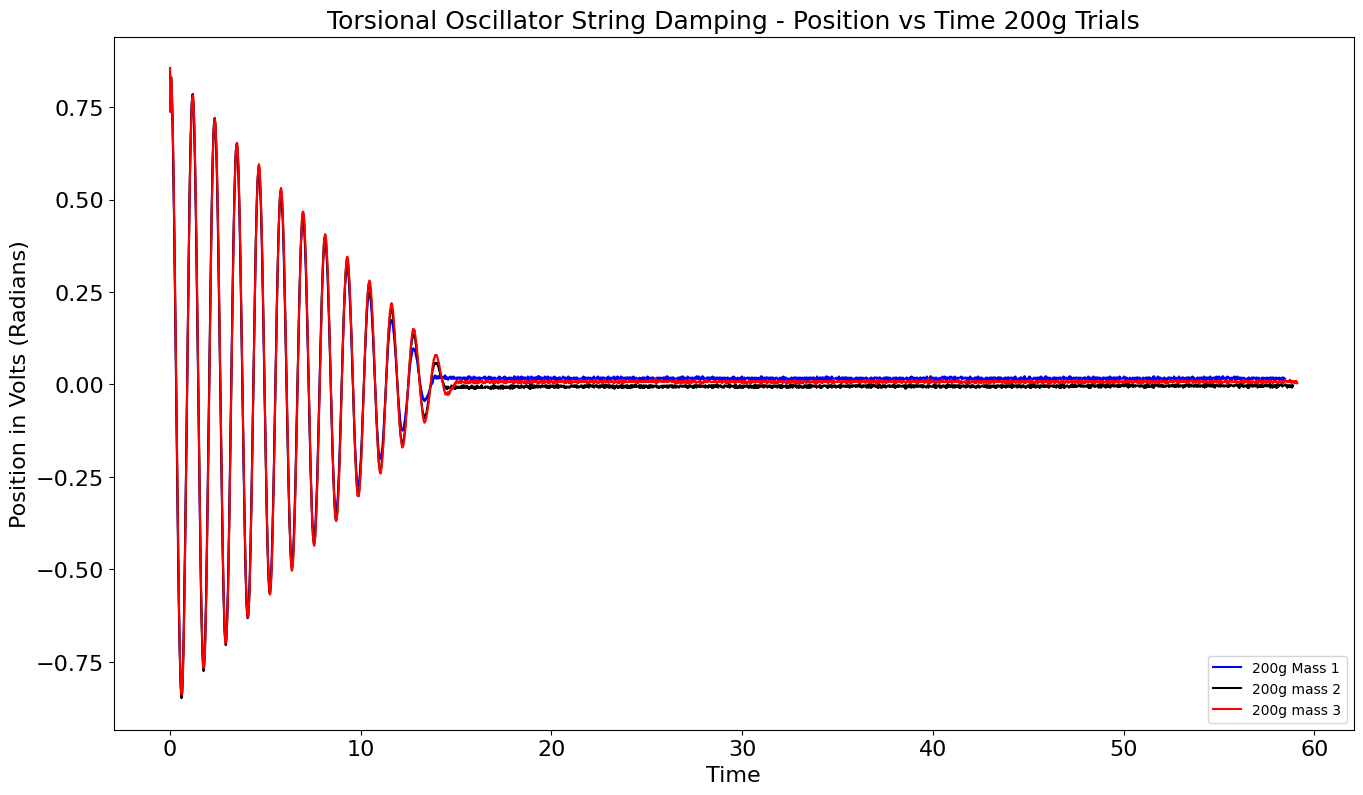

In [97]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(SD201_df['Time'], SD201_df['Position'], color = 'blue', label = '200g Mass 1')
p2 = ax.plot(SD202_df['Time'], SD202_df['Position'], color = 'black', label = '200g mass 2')
p3 = ax.plot(SD203_df['Time'], SD203_df['Position'], color = 'red', label = '200g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Volts (Radians)', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Torsional Oscillator String Damping - Position vs Time 200g Trials', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [98]:
#StringDamping301
#300g (150g per side) test 1
SD301_df = driveSheetToDF(sheet_id, "stringdamping301")
SD301_df = deleteRowsDF(0.40,SD301_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#StringDamping302
SD302_df = driveSheetToDF(sheet_id, "stringdamping302")
SD302_df = deleteRowsDF(0.70,SD302_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#StringDamping303
SD303_df= driveSheetToDF(sheet_id, "stringdamping303")
SD303_df = deleteRowsDF(0.62,SD303_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


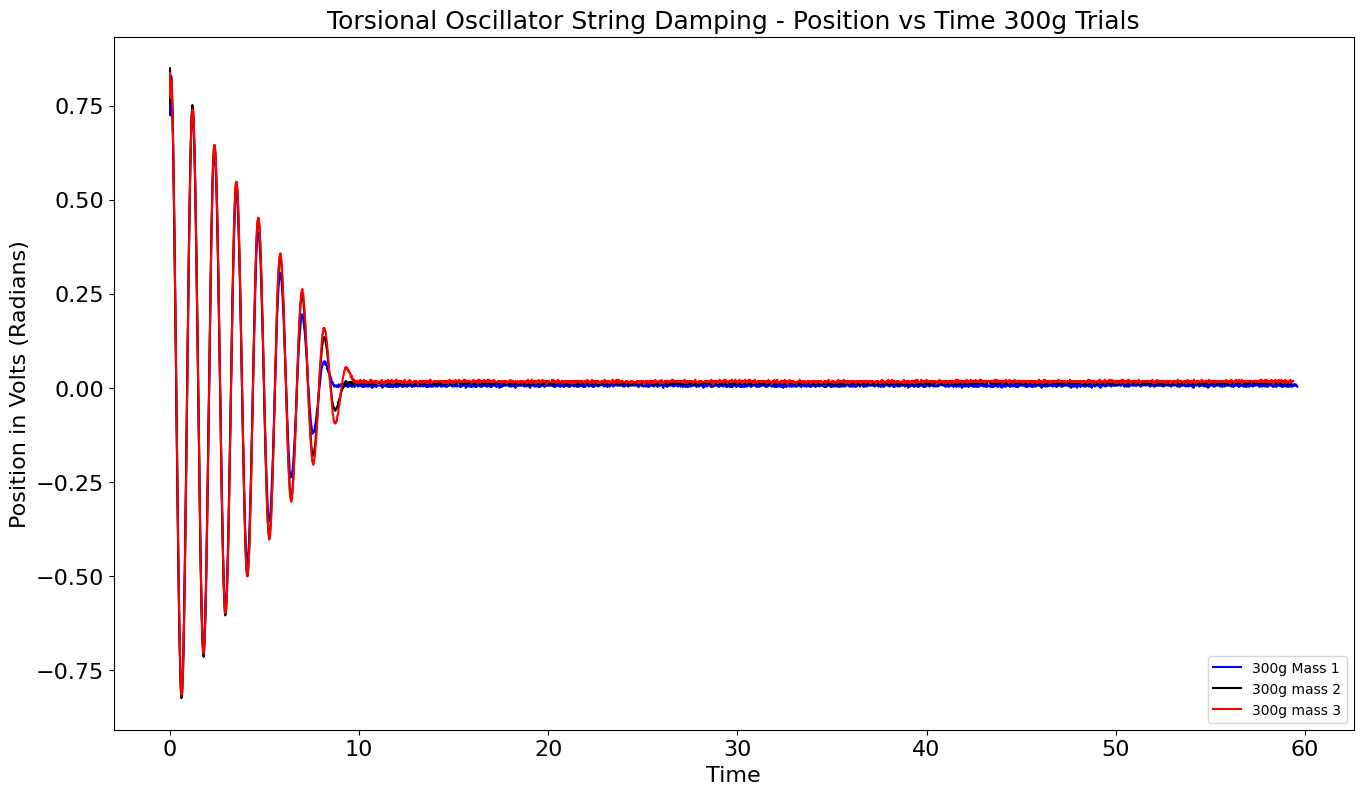

In [99]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(SD301_df['Time'], SD301_df['Position'], color = 'blue', label = '300g Mass 1')
p2 = ax.plot(SD302_df['Time'], SD302_df['Position'], color = 'black', label = '300g mass 2')
p3 = ax.plot(SD303_df['Time'], SD303_df['Position'], color = 'red', label = '300g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Volts (Radians)', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Torsional Oscillator String Damping - Position vs Time 300g Trials', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [100]:
#StringDamping401
#400g (200g per side) test 1
SD401_df = driveSheetToDF(sheet_id, "stringdamping401")
SD401_df = deleteRowsDF(0.80,SD401_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#StringDamping402
SD402_df = driveSheetToDF(sheet_id, "stringdamping402")
SD402_df = deleteRowsDF(1.22,SD402_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#StringDamping403
SD403_df = driveSheetToDF(sheet_id, "stringdamping403")
SD403_df = deleteRowsDF(0.98,SD403_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


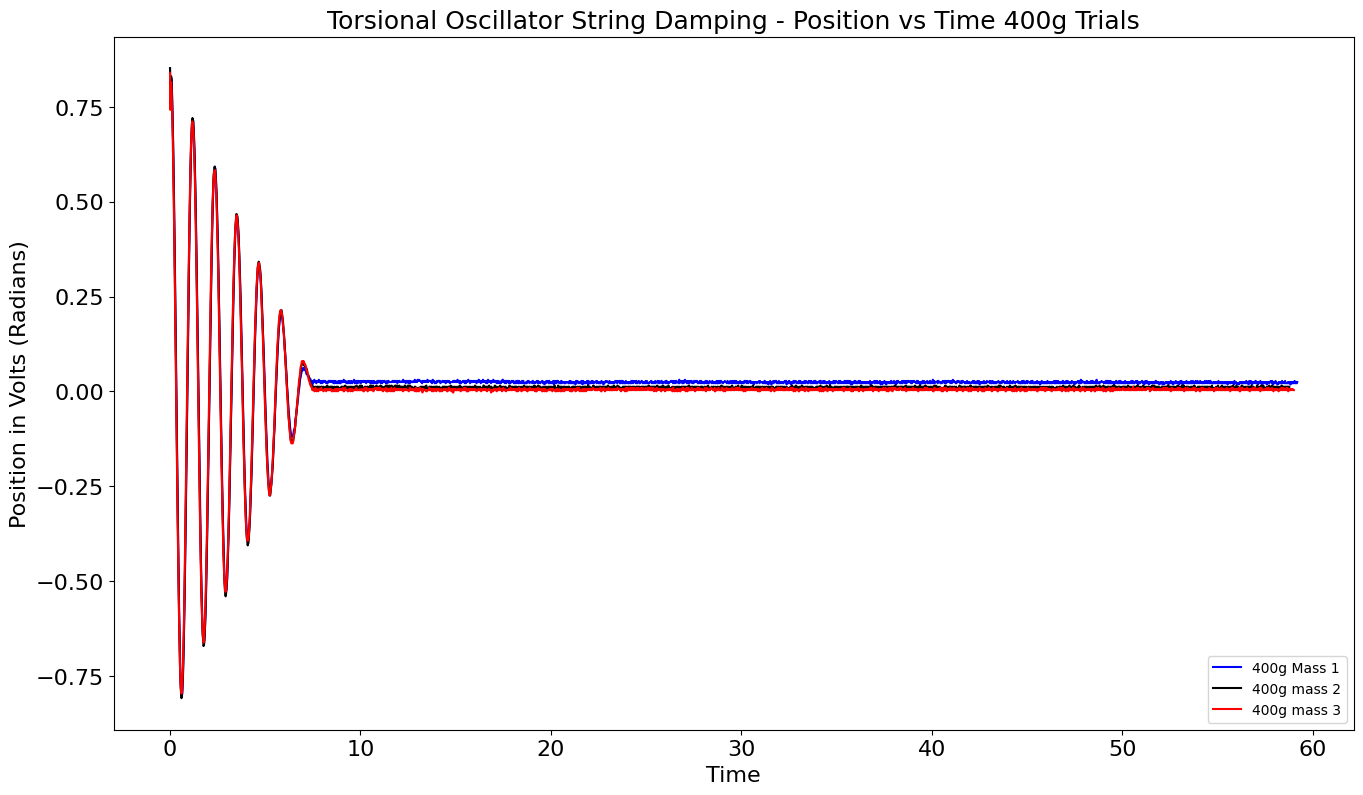

In [101]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(SD401_df['Time'], SD401_df['Position'], color = 'blue', label = '400g Mass 1')
p2 = ax.plot(SD402_df['Time'], SD402_df['Position'], color = 'black', label = '400g mass 2')
p3 = ax.plot(SD403_df['Time'], SD403_df['Position'], color = 'red', label = '400g mass 3')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Volts (Radians)', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Torsional Oscillator String Damping - Position vs Time 400g Trials', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

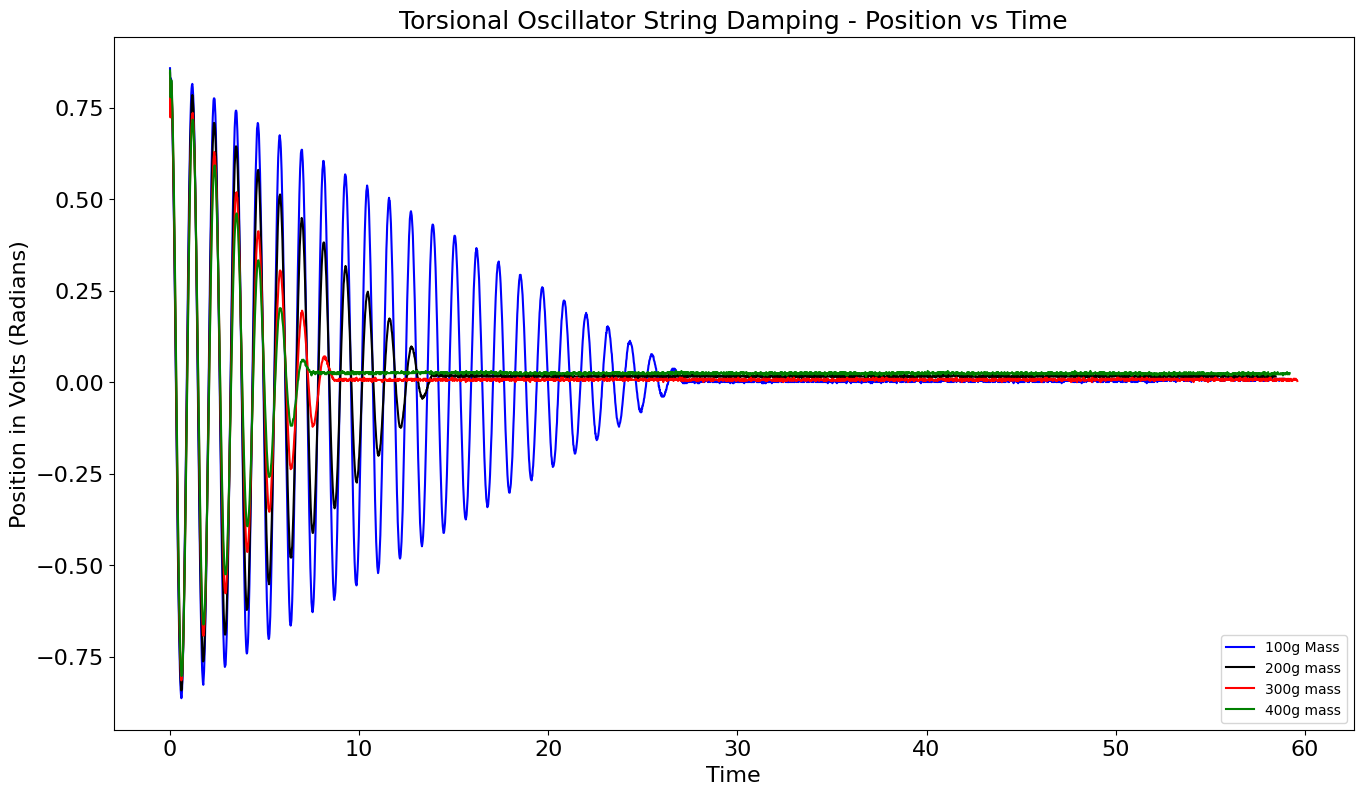

In [102]:
#Copied from Terry's Python_Plot&DataAnalysis.ipynb

fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(SD101_df['Time'], SD101_df['Position'], color = 'blue', label = '100g Mass')
p2 = ax.plot(SD201_df['Time'], SD201_df['Position'], color = 'black', label = '200g mass')
p3 = ax.plot(SD301_df['Time'], SD301_df['Position'], color = 'red', label = '300g mass')
p4 = ax.plot(SD401_df['Time'], SD401_df['Position'], color = 'green', label = '400g mass')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Volts (Radians)', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Torsional Oscillator String Damping - Position vs Time', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

In [103]:
#%% cell break

### Magnetic Damping

R side 11 full turns from outside edge to fully over

5trials

0 Turns

2.75 Turns

5.50 Turns

8.25 Turns

11.00 Turns

In [104]:
#%% how to make a cell in Spyder.
#Magnetic Damping

#Magnetic Damping 01
MD01_df = driveSheetToDF(sheet_id, "magdamping01")
MD01_df = deleteRowsDF(0.88,MD01_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


#Magnetic Damping 02
MD02_df = driveSheetToDF(sheet_id, "magdamping02")
MD02_df = deleteRowsDF(0.64,MD02_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


#Magnetic Damping 03
MD03_df = driveSheetToDF(sheet_id, "magdamping03")
MD03_df = deleteRowsDF(1.28,MD03_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


In [105]:
#magdamping2751

#Magnetic Damping 2.75 turns 1
MD2751_df = driveSheetToDF(sheet_id, "magdamping2751")
MD2751_df = deleteRowsDF(1.36,MD2751_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#Magnetic Damping 2.75 turns 2
#Not sure about where to cut this one. Lots of noise in beginning.
MD2752_df = driveSheetToDF(sheet_id, "magdamping2752")
MD2752_df = deleteRowsDF(1.08,MD2752_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#Magnetic Damping 2.75 turns 3
MD2753_df = driveSheetToDF(sheet_id, "magdamping2753")
MD2753_df = deleteRowsDF(1.00,MD2753_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


In [106]:
#magdamping5501

#Magnetic Damping 5.50 turns 1
MD5501_df = driveSheetToDF(sheet_id, "magdamping5501")
MD5501_df = deleteRowsDF(0.98,MD5501_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


#Magnetic Damping 5.50 turns 2
MD5502_df = driveSheetToDF(sheet_id, "magdamping5502")
MD5502_df = deleteRowsDF(0.94,MD5502_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


#Magnetic Damping 5.50 turns 3
#Not sure about where to cut this one. Lots of noise in beginning.
MD5503_df = driveSheetToDF(sheet_id, "magdamping5503")
MD5503_df = deleteRowsDF(1.24,MD5503_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


In [107]:
#magdamping8251

#Magnetic Damping 8.25 turns 1
MD8251_df = driveSheetToDF(sheet_id, "magdamping8251")
MD8251_df = deleteRowsDF(0.86,MD8251_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.

#Magnetic Damping 8.25 turns 2
MD8252_df = driveSheetToDF(sheet_id, "magdamping8252")
MD8252_df = deleteRowsDF(0.86,MD8252_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


#Magnetic Damping 8.25 turns 3
MD8253_df = driveSheetToDF(sheet_id, "magdamping8253")
MD8253_df = deleteRowsDF(0.78,MD8253_df,'Time') #drop extra rows before oscilation starts and set time to reflect dropped rows.


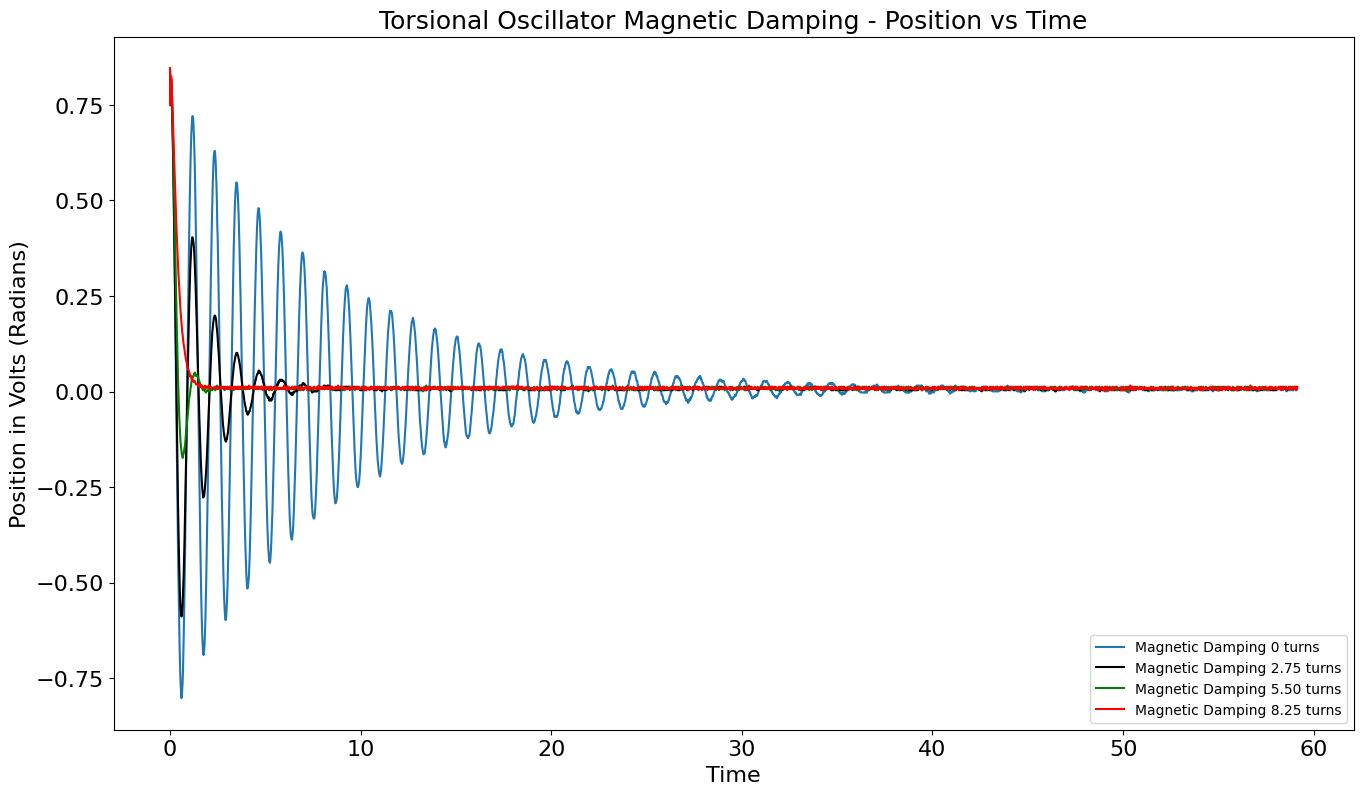

In [108]:
fig, ax = plt.subplots()
txt = 'black'
p1 = ax.plot(MD01_df['Time'], MD01_df['Position'], label = 'Magnetic Damping 0 turns')
p2 = ax.plot(MD2751_df['Time'], MD2751_df['Position'],  color = 'black', label = 'Magnetic Damping 2.75 turns')
p3 = ax.plot(MD5501_df['Time'], MD5501_df['Position'],  color = 'green', label = 'Magnetic Damping 5.50 turns')
p4 = ax.plot(MD8251_df['Time'], MD8251_df['Position'],  color = 'red', label = 'Magnetic Damping 8.25 turns')
#p2 = ax.plot(ddate, fit, color = 'black', label = 'Linear Fit')
#p3 = ax.fill_between(ddate, fit-PI_68, fit+PI_68, color = 'orange', label = r'1$\sigma$ PI')
#p4 = ax.fill_between(ddate, fit-CI_95, fit+CI_95, color = 'yellow', label = r'2$\sigma$ CI')
ax.set_ylabel(r'Position in Volts (Radians)', color=txt, fontsize=16)
ax.set_xlabel(r'Time', color=txt, fontsize=16)
ax.set_title(r'Torsional Oscillator Magnetic Damping - Position vs Time', color=txt, fontsize = 18)
ax.tick_params(axis='x', labelsize=16, colors=txt)
ax.tick_params(axis='y', labelsize=16, colors=txt)
ax.legend(loc='lower right')
plt.rcParams["figure.figsize"] = (16,9)
plt.show()

After results from 8.25, we decided 11 Full turns of the magnetic dampers was not worthwile.

We may want some data at 1 turns, 2 turns, 3 turns, 4 turns. etc.

In [109]:
#%% cell break

### Fluid Damping
